<a href="https://colab.research.google.com/github/daniilomendes/Neural_Networks_e_Deep_Learning./blob/main/Neural_Networks_e_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rede Neural na Prática

In [ ]:
#Bibliotecas
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [ ]:
#Base de dados
base = datasets.load_iris()
previsores = base.data
classe = base.target
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#transformando a classe para formato dummy, pois temos uma rede neural com 3 neuronios na camada de saida
classe_dummy = np_utils.to_categorical(classe)
classe_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
#dividindo a vase de dados entre treinamento e teste(30% para teste)
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, 
                                                                  classe_dummy, 
                                                                  test_size = 0.3, 
                                                                  random_state = 0)

In [ ]:
#criação da estrutura da rede neural com a classe Sequential
modelo = Sequential()
#primeira camada oculta, 5 neuronios, 4 neuroniso de entrada
modelo.add(Dense(units = 5, input_dim = 4))
#segunda camada oculta
modelo.add(Dense(units = 4))
#terceira camada oculta
#função sofmax pois temos um problema de classificação com mais de duas classes
#é gerada uma probabilidade em cada neuronio
modelo.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
#visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#configuração dos parametros da rede neural(adam = algoritmo para atualizar os pesos e loss = calculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#treinamento, dividindo a base de treinamento em uma porção para validação
modelo.fit(x_treinamento, y_treinamento, epochs = 1000, validation_data = (x_teste,y_teste))

Epoch 1/1000
4/4 [==============================] - 1s 62ms/step - loss: 1.7143 - accuracy: 0.2762 - val_loss: 1.5319 - val_accuracy: 0.2667
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.5935 - accuracy: 0.2476 - val_loss: 1.4620 - val_accuracy: 0.2444
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.4764 - accuracy: 0.2286 - val_loss: 1.4053 - val_accuracy: 0.2000
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.3823 - accuracy: 0.1905 - val_loss: 1.3666 - val_accuracy: 0.1556
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.3092 - accuracy: 0.1524 - val_loss: 1.3424 - val_accuracy: 0.0889
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.2535 - accuracy: 0.1333 - val_loss: 1.3310 - val_accuracy: 0.0889
Epoch 7/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.2187 - accuracy: 0.2762 - val_loss: 1.3224 - val_accuracy: 0.1778
Epoch 8/1000
4/4 [=

In [ ]:
#previsões e mudar a variavel para True ou False de acordo com o threshold 0,5
previsoes = modelo.predict(x_teste)
previsoes = (previsoes > 0.5)
previsoes

array([[False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [Fa

In [ ]:
#como é um problema com três saídas, precisamos buscar a posição que possui o maiso valor 
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsoes_matrix = [np.argmax(t) for t in previsoes]

In [ ]:
#geração da matriz de confusão
confusao = confusion_matrix(y_teste_matrix, y_previsoes_matrix)
confusao

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

#Deep Learning

In [ ]:
!pip install tensorflow 

In [ ]:
#Bibliotecas
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from keras.datasets import mnist

11501568/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

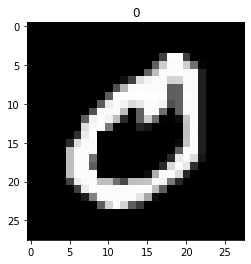

In [ ]:
#obetendo os dados e divisão automatica entre treino e tests
(x_treinamento, y_treinamento),(x_teste, y_teste) = mnist.load_data()
#visualização de imagens especificas
plt.imshow(x_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [ ]:
x_treinamento = x_treinamento.reshape((len(x_treinamento), np.prod(x_treinamento.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
#transformação do dados para float para podermos normalizar os dados
x_treinamento = x_treinamento.astype('float32')
x_teste = x_teste.astype('float32')

In [ ]:
#normalização
x_treinamento /= 255
x_teste /= 255

In [ ]:
#transformação para o formato dummy
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
#estrutura da rede neural
#dropout é utilizado para zerar uma porcentagem dos neuronios, evitando o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
#visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [ ]:
#configuração dos paramentros da rede neural e treinamento(utilizando base de dados de validação)
#na variavel historica temos os historicos das execuções
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treinamento, y_treinamento, epochs = 20, validation_data = (x_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0709 - accuracy: 0.6264 - val_loss: 57.0325 - val_accuracy: 0.7630
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5220 - accuracy: 0.8415 - val_loss: 60.6158 - val_accuracy: 0.8123
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4119 - accuracy: 0.8814 - val_loss: 58.5521 - val_accuracy: 0.8434
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3604 - accuracy: 0.8962 - val_loss: 50.0107 - val_accuracy: 0.8733
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3213 - accuracy: 0.9065 - val_loss: 43.6760 - val_accuracy: 0.8918
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.9128 - val_loss: 41.0586 - val_accuracy: 0.8996
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.9186 - val_loss: 35.0104 - val_ac

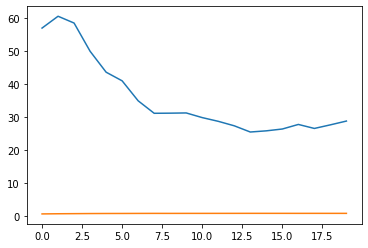

In [ ]:
#grafico para a visualização dos erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performace da rede
plt.plot(historico.history['val_accuracy'])

In [ ]:
#obtendo as previsões
previsoes = modelo.predict(x_teste)
previsoes

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#valor maximo(com a probabilidade maior por serem 10 saidas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 969,    0,    3,    2,    0,    1,    3,    0,    2,    0],
       [   0, 1077,    9,   18,    0,    0,    1,    1,   29,    0],
       [   8,    0,  992,   19,    2,    0,    4,    5,    1,    1],
       [   1,    0,    7,  995,    0,    1,    0,    1,    4,    1],
       [   3,    2,    5,    1,  863,    0,   16,    4,    7,   81],
       [   8,    1,    2,   87,    3,  764,    7,    1,   13,    6],
       [  17,    2,    4,    0,    3,    3,  920,    0,    9,    0],
       [   2,    2,   10,   84,    2,    0,    0,  888,    0,   40],
       [   7,    1,    5,   50,    3,    3,    7,    1,  893,    4],
       [   7,    2,    0,   37,    4,    5,    2,    5,    8,  939]])

In [ ]:
#previsao com um novo registro, convertendo o array para o formato de matriz
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#passando a mesma posição para o modelo prever
novo = x_treinamento[20]
#matriz para o vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]

#Deep Learning II

In [ ]:
#Bibliotecas
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/34.Prática em Python/dados/Credit2.csv', sep = ';')
dataset

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,good
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,bad
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,good
3,4,<0,existing paid,42,7882,2,4,45,1,2,good
4,5,<0,delayed previously,24,4870,3,4,53,2,2,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,996,no checking,existing paid,12,1736,3,4,31,1,1,good
996,997,<0,existing paid,30,3857,4,4,40,1,1,good
997,998,no checking,existing paid,12,804,4,4,38,1,1,good
998,999,<0,existing paid,45,1845,4,4,23,1,1,bad


In [ ]:
#separação das variaveis, ignora primeira pois não tem valor semantico
x = dataset.iloc[:,1:10].values
y = dataset.iloc[:, 10].values
#temos um array e não mais um dataframe
x

array([['<0', 'critical/other existing credit', 6, ..., 67, 2, 1],
       ['0<=X<200', 'existing paid', 48, ..., 22, 1, 1],
       ['no checking', 'critical/other existing credit', 12, ..., 49, 1,
        2],
       ...,
       ['no checking', 'existing paid', 12, ..., 38, 1, 1],
       ['<0', 'existing paid', 45, ..., 23, 1, 1],
       ['0<=X<200', 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [ ]:
#labelencoder colina checking_status
#atribui valores de 0 a 3
labelencoder = LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:, 0])
x

array([[1, 'critical/other existing credit', 6, ..., 67, 2, 1],
       [0, 'existing paid', 48, ..., 22, 1, 1],
       [3, 'critical/other existing credit', 12, ..., 49, 1, 2],
       ...,
       [3, 'existing paid', 12, ..., 38, 1, 1],
       [1, 'existing paid', 45, ..., 23, 1, 1],
       [0, 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [ ]:
#onehotencoder coluna credit_history
#deve adicionar 5 colunas
onehotencoder = make_column_transformer((OneHotEncoder(categories = 'auto', sparse = False), [1]), remainder = "passthrough")
x = onehotencoder.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 67, 2, 1],
       [0.0, 0.0, 0.0, ..., 22, 1, 1],
       [0.0, 1.0, 0.0, ..., 49, 1, 2],
       ...,
       [0.0, 0.0, 0.0, ..., 38, 1, 1],
       [0.0, 0.0, 0.0, ..., 23, 1, 1],
       [0.0, 1.0, 0.0, ..., 27, 1, 1]], dtype=object)

In [ ]:
#excluimos a variavel para evitar o dummy variable trap
x = x[:,1:]
x

array([[1.0, 0.0, 0.0, ..., 67, 2, 1],
       [0.0, 0.0, 1.0, ..., 22, 1, 1],
       [1.0, 0.0, 0.0, ..., 49, 1, 2],
       ...,
       [0.0, 0.0, 1.0, ..., 38, 1, 1],
       [0.0, 0.0, 1.0, ..., 23, 1, 1],
       [1.0, 0.0, 0.0, ..., 27, 1, 1]], dtype=object)

In [ ]:
#label encoder com a classe
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
#separação em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(len(x_train), len(x_test), len(y_train), len(y_test))

800 200 800 200


In [ ]:
#feature scalling, padronização z-score
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test

array([[-0.65270587, -0.30966177,  0.95357636, ..., -0.50870719,
        -0.71596668, -0.42214126],
       [-0.65270587, -0.30966177,  0.95357636, ..., -0.85315557,
        -0.71596668,  2.36887531],
       [-0.65270587, -0.30966177,  0.95357636, ...,  0.61075002,
        -0.71596668, -0.42214126],
       ...,
       [ 1.53208366, -0.30966177, -1.04868371, ...,  0.26630165,
         1.04100677, -0.42214126],
       [-0.65270587,  3.22932987, -1.04868371, ...,  0.52463793,
         4.55495365, -0.42214126],
       [-0.65270587, -0.30966177,  0.95357636, ...,  0.52463793,
        -0.71596668,  2.36887531]])

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
80/80 [==============================] - 1s 1ms/step - loss: 0.6843 - accuracy: 0.6925
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.6975
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.6975
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.6975
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.6975
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5275 - accuracy: 0.6975
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.6975
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.6975
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.6975
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.6975
Epoch 11/

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [ ]:
#confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24,  34],
       [ 22, 120]])